In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [2]:
data = pd.read_csv('Desktop/CS599/fraud_data.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(6362620, 11)
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

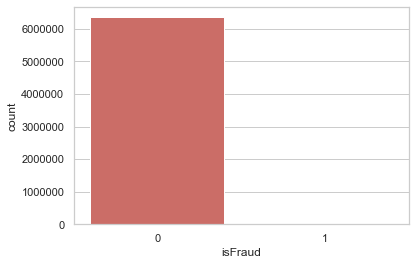

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x = 'isFraud', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [7]:
no_fraud_count = len(data[data['isFraud'] == 0])
fraud_count = len(data[data['isFraud'] == 1])
pct_no_fraud = no_fraud_count / (no_fraud_count + fraud_count)
print("percentage of no fraud is", pct_no_fraud * 100)
pct_fraud = fraud_count / (no_fraud_count + fraud_count)
print("percentage of fraud", pct_fraud * 100)

percentage of no fraud is 99.87091795518198
percentage of fraud 0.12908204481801522


In [8]:
data.groupby('type').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,244.490093,168920.242004,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.000000,0.00000
CASH_OUT,240.900735,176273.964346,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,0.001840,0.00000
DEBIT,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.000000,0.00000
PAYMENT,244.378179,13057.604660,6.821683e+04,6.183789e+04,0.000000e+00,0.000000e+00,0.000000,0.00000
TRANSFER,246.657304,910647.009645,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.00003


In [9]:
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [10]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
data.groupby('isFlaggedFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,
0,243.396506,1.798501e+05,8.338655e+05,8.550962e+05,1.100704e+06,1.224999e+06,0.001288
1,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.000000e+00,0.000000e+00,1.000000


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


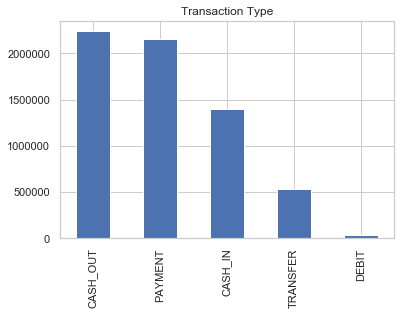

<Figure size 432x288 with 0 Axes>

In [12]:
print(data.type.value_counts())

f, ax = plt.subplots(1, 1)
data.type.value_counts().plot(kind = 'bar', title = "Transaction Type", ax = ax)
plt.show()
plt.savefig('transaction_type_amount')

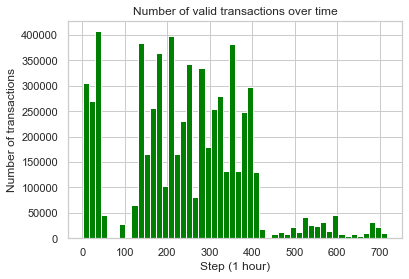

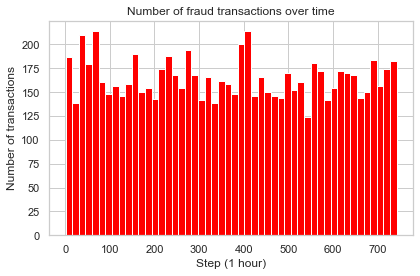

In [13]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

bins = 50

valid.hist(column = "step",color = "green",bins = bins)
plt.xlabel("Step (1 hour)")
plt.ylabel("Number of transactions")
plt.title("Number of valid transactions over time")

fraud.hist(column = "step",color = "red",bins = bins)
plt.xlabel("Step (1 hour)")
plt.ylabel("Number of transactions")
plt.title("Number of fraud transactions over time")

plt.tight_layout()
plt.show()

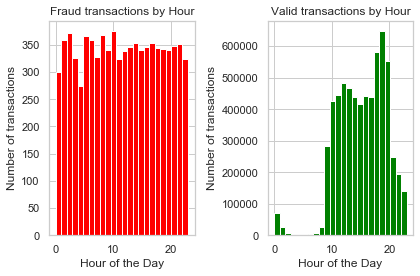

In [14]:
num_hours = 24
fraud_hours = fraud.step % num_hours
valid_hours = valid.step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins = num_hours, color = "red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("Number of transactions")

plt.subplot(1, 2, 2)
valid_hours.hist(bins = num_hours, color = "green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("Number of transactions")

plt.tight_layout()
plt.show()

In [17]:
data["HourOfDay"] = np.nan
data.HourOfDay = data.step % 24
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,HourOfDay
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


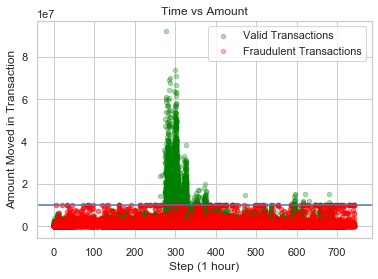

In [18]:
alpha = 0.3
fig, ax = plt.subplots()
valid.plot.scatter(x = "step",y = "amount",color = "green",alpha = alpha,ax = ax,label = "Valid Transactions")
fraud.plot.scatter(x = "step",y = "amount",color = "red",alpha = alpha,ax = ax, label = "Fraudulent Transactions")

plt.title("Time vs Amount")
plt.xlabel("Step (1 hour)")
plt.ylabel("Amount Moved in Transaction")
plt.legend(loc = "upper right")

plt.axhline(y = 10000000)
plt.show()

In [22]:
cat_vars = ['type']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix = var)
    data1 = data.join(cat_list)
    data = data1
cat_vars = ['type']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

print(list(data.columns))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'HourOfDay', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [23]:
data_final = data[to_keep]
data_final = data_final[data_final.columns.difference(['nameOrig', 'nameDest'])]
data_final.columns.values

array(['HourOfDay', 'amount', 'isFlaggedFraud', 'isFraud',
       'newbalanceDest', 'newbalanceOrig', 'oldbalanceDest',
       'oldbalanceOrg', 'step', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'], dtype=object)

In [24]:
X = data_final.loc[:, data_final.columns != 'isFraud']
Y = data_final.loc[:, data_final.columns == 'isFraud']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
columns = X_train.columns

os_data_X,os_data_Y = os.fit_sample(X_train, Y_train)
os_data_X = pd.DataFrame(data = os_data_X,columns = columns )
os_data_Y = pd.DataFrame(data = os_data_Y,columns = ['isFraud'])

print("Length of oversampled data is ",len(os_data_X))
print("Number of no fraud in oversampled data",len(os_data_Y[os_data_Y['isFraud'] == 0]))
print("Number of fraud",len(os_data_Y[os_data_Y['isFraud'] == 1]))
print("Proportion of no fraud data in oversampled data is ",len(os_data_Y[os_data_Y['isFraud'] == 0]) / len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_Y[os_data_Y['isFraud'] == 1]) / len(os_data_X))

Length of oversampled data is  8896080
Number of no fraud in oversampled data 4448040
Number of fraud 4448040
Proportion of no fraud data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [16]:
#data_final_vars = data_final.columns.values.tolist()
#Y = ['isFraud']
#X = [i for i in data_final_vars if i not in Y]

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

#logreg = LogisticRegression()

#rfe = RFE(logreg, 20)
#rfe = rfe.fit(os_data_X, os_data_Y.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
cols = ['amount', 'newbalanceDest', 'newbalanceOrig', 
        'oldbalanceDest', 'oldbalanceOrg', 'step', 
        'type_CASH_OUT','type_TRANSFER', 'HourOfDay']
X = os_data_X[cols]
#X = X.transpose()
Y = os_data_Y['isFraud']
#Y = Y.transpose()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1238765   95140]
 [ 130425 1204494]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92   1333905
           1       0.93      0.90      0.91   1334919

    accuracy                           0.92   2668824
   macro avg       0.92      0.92      0.92   2668824
weighted avg       0.92      0.92      0.92   2668824



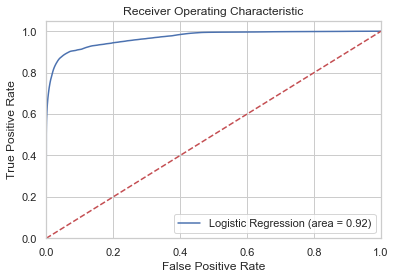

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()